In [2]:
from pde import FieldCollection, PDEBase, UnitGrid, ScalarField
from matplotlib import pyplot as plt
import numpy as np 

# Reaction-Diffusion Equations (Turing's Model)

$\frac{\partial u}{\partial t} = F(u,v) -d_uv+D_u\Delta u$

$\frac{\partial v}{\partial t} = G(u,v) -d_vv+D_v\Delta v$

where $u$ and $v$ are enzyme and inhibitors, respectively.

In [184]:
class TuringPDE(PDEBase):
    """ Turing model with diffusive coupling """

    def __init__(self, a1, a2, b1, b2, Du, Dv, bc):
    #def __init__(self, a1, b1, s, Du, Dv, bc):
        
        self.bc = bc
        
        self.Du = Du
        self.Dv = Dv
        
        self.a1 = a1
        self.a2 = a2
        
        self.b1 = b1
        self.b2 = b2
        
        #self.s = s

    def evolution_rate(self, state, t=0):
        u, v = state  

        #u_t = (self.s/self.a1)*(self.a1-u*v)+Du*u.laplace(bc=self.bc) # Bart's papers
        #v_t = (self.s/self.a1)*(u*v-v-b1)+Dv*v.laplace(bc=self.bc)
        
        u_t = ((self.a1*u)-v-(u**self.a2)) + self.Du*u.laplace(bc=self.bc) # Miura's paper
        v_t = ((self.b1*u)-(self.b2*v)) + self.Dv*v.laplace(bc=self.bc)

        return FieldCollection([u_t, v_t])

### Initial conditions

(<matplotlib.image.AxesImage at 0x22e56330>,
 Text(0.5, 0, 'x'),
 Text(0, 0.5, 'y'),
 None)

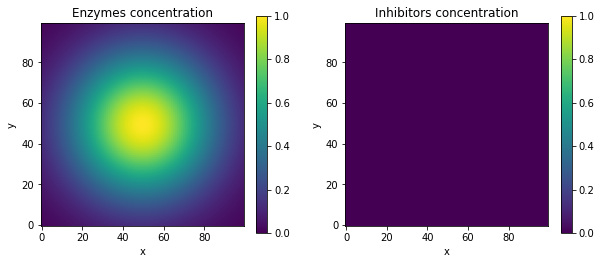

In [211]:
# Initial grid
Nx, Ny = 100, 100
N = [Nx, Ny]
grid = UnitGrid(N, periodic=[True, True])


# Initial concetration of enzymes (gausssian)
x, y = np.meshgrid(np.linspace(0,1,Nx,dtype=np.float64), np.linspace(0,1,Ny,dtype=np.float32))
mu, sigma = 0.5, 0.25
enzymes = np.exp(- ((x-mu)**2+(y-mu)**2) / ( 2.0*sigma**2 ) )

# Initial concetration of inhibitors
inhibitors = np.zeros(N, dtype=np.float32)
#x, y = np.meshgrid(np.linspace(0,1,Nx,dtype=np.float64), np.linspace(0,1,Ny,dtype=np.float32))
#mu, sigma = 1, 0.1
#inhibitors = np.exp(- ((x-mu)**2+(y-mu)**2) / ( 2.0*sigma**2 ) )

#inhibitors = FieldCollection.scalar_random_uniform(1, grid)[0].data

# Setting scalar field of concentrations
enzyme_field = ScalarField(grid, data=enzymes)
inhibitor_field = ScalarField(grid, data=inhibitors)

# Defining initial state for u and v
state = FieldCollection(fields = [enzyme_field, inhibitor_field])
#state = FieldCollection.scalar_random_uniform(2, grid)


plt.figure(figsize=(10, 4))
plt.subplot(121),plt.title('Enzymes concentration')
plt.imshow(enzymes, vmin=0, vmax=1), plt.xlabel('x'),plt.ylabel('y'), plt.colorbar(),plt.gca().invert_yaxis()

plt.subplot(122), plt.title('Inhibitors concentration')
plt.imshow(inhibitors, vmin=0, vmax=1), plt.xlabel('x'),plt.ylabel('y'), plt.colorbar(), plt.gca().invert_yaxis()

### Free Parameters

In [192]:
a1 = 0.6
a2 = 3
Du = 2*10**(-4)
b1 = 1.5
b2 = 2
Dv = 10**(-2)

In [171]:
a1 = 16
b1 = 12 
s = 0.5

Du = 0.25
Dv = 0.0625

### Solving Partial Differential Equation of Turing's Model

In [212]:
bc = ["periodic","periodic"] # Bouding Conditions

turing_ceq =  TuringPDE(a1,a2,b1,b2,Du,Dv,bc)
#turing_ceq =  TuringPDE(a1,b1,s,Du,Dv,bc)

In [219]:
result = turing_ceq.solve(state, t_range=180, dt=0.001)

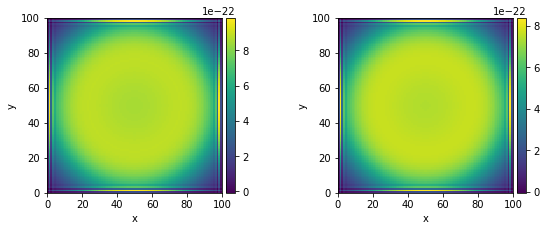

In [220]:
plt.figure(figsize=(10, 4))
result.plot()
plt.show()

## ----- Tests ------------

(<matplotlib.image.AxesImage at 0x2198f3d0>,
 Text(0.5, 0, 'X'),
 Text(0, 0.5, 'Y'),
 None)

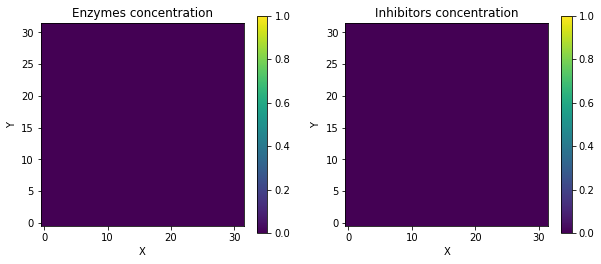

In [190]:
plt.figure(figsize=(10, 4))
plt.subplot(121),plt.title('Enzymes concentration')
plt.imshow(result[0].data, vmin=0, vmax=1), plt.xlabel('X'),plt.ylabel('Y'), plt.colorbar(),plt.gca().invert_yaxis()

plt.subplot(122), plt.title('Inhibitors concentration')
plt.imshow(result[1].data, vmin=0, vmax=1), plt.xlabel('X'),plt.ylabel('Y'), plt.colorbar(), plt.gca().invert_yaxis()

In [ ]:
#grid = UnitGrid([128, 128], periodic=[True, True]) # Grid
#state = FieldCollection.scalar_random_uniform(2, grid) # Condição inicial


#bc_x_left={"derivative":0.1}
#bc_x_right={"value":"sin(y / 2)"}
#bc_x=[bc_x_left, bc_x_right]

#bc_x="periodic"

In [ ]:
class pulsePDE(PDEBase):
    """ diffusive"""

    def __init__(self, Du, bc):
        self.bc = bc
        self.Du = Du

    def evolution_rate(self, state, t=0):
        u, v = state  # 
        u_t =  self.Du*u.laplace(bc=self.bc)
        v_t =  self.Du*u.laplace(bc=self.bc)

        return FieldCollection([u_t,v_t])

In [ ]:
grid = UnitGrid(N, periodic=[True, True])

enzyme_field = ScalarField(grid, data=enzymes)
state = FieldCollection(fields = [enzyme_field, enzyme_field]) 

bc = ["periodic","periodic"] # Condições de contorno

# Criando o objeto da equaçao
eq = pulsePDE(Du = 2*10**(1), bc=bc )

result = eq.solve(state, t_range=0, dt=0.01)

u = result[0].data
v = result[1].data

result = eq.solve(state, t_range=10, dt=0.01)
plt.imshow(result[0].data,vmin=vmin0, vmax=vmax0)
plt.colorbar()
plt.show()